<a href="https://colab.research.google.com/github/weylanedutra/data-science-portfolio/blob/main/airbnb_nz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on New Zealand Airbnb data in Python**

<img alt="Analisando Airbnb" width="100%" src="https://images.unsplash.com/photo-1501884742805-c94fc1d8985b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80">

## **1. Introduction**


### **1.1 Airbnb**

Airbnb is an inovative online platform that connects hosts (people who want to rent out their homes) and guests (people looking for accommodations) creating a personalized alternative way of accommodation. 

By 2021 the company had **hosted more than 900 million** people and become a unique service that is used by the whole world.

The airbnb platform generate a lot of data that can be analysed to help the company to understand its business and get insights of it. Saying that, data analytcs become a crucial factor for them.

### **1.2 New Zealand**

New Zealand, Aotearoa in Māori (the land of the long white cloud), is one of the most beautiful countries on earth, and even with its modest size, it packs a lot of history, culture, and attractions to experience and explore.

Other than that, the country is known for its stunning national parks, dynamic Māori culture, incredible hiking trails, and world-class skiing and surfing. 


### **1.3 Objectives**

In this notebook, we are going to perform an **Exploratory Data Analysis** of airbnb in New Zealand in order to answer the following questions:

1.   What is the average of minimum nights? 
2.   What is the most rented room type?
3.   What is the average price in the country? 
4.   What is the most expensive and the cheapest location?
5.   What is the location with more properties listed?
6.   What is the correlation between the variables?

## **2. Acquiring and loading data**

### **2.1 Data Source**

* **Datasource:** [Inside Airbnb](http://insideairbnb.com/get-the-data.html)
* **Location:** New Zealand
* **File name:** `listings.csv` 
* **Description:** Summary information and metrics for listings in New Zealand.
* **Last updated date:** The data used in this study was compiled in 16 June, 2021.

#### **2.1.1 Variables Glossary**

| Attribute | Description
| --- | --- |
| `id` | Airbnb's unique identifier for the listing
| `name` | Name of the listing
| `host_id` | Airbnb's unique identifier for the host/user
| `host_name` | Name of the host, usually just the first name(s)
| `neighbourhood_group` | The neighbourhood group as geocoded
| `neighbourhood` | Name of the neighbourhood
| `latitude` | The World Geodetic System (WGS84) projection for latituded
| `longitude` | The World Geodetic System (WGS84) projection for longitude
| `room_type` | Type of room that is offered
| `price` | Daily price in local currency
| `minimum_nights` | Minimum number of night stay for the listing
| `number_of_reviews` | The number of reviews the listing has
| `number_of_reviews_ltm` | The number of reviews the listing has (in the last 12 months)
| `last_review` | The date of the last/newest review
| `reviews_per_month` | The number of reviews the listing has over the lifetime of the listing
| `calculated_host_listings_count` | The number of listings the host has in the current scrape, in the city/region geography
| `availability_365` | Number of days of availability within 365 days


### **2.2 Load Python libraries**

* `Pandas` library will be used for data analysis
* `Matplotlib` and `Seaborn` libraries will be used for data visualization

In [2]:
# Import the necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **2.3 Load the dataset**

In [3]:
# Import the listings.csv file into a Dataframe

airbnb = pd.read_csv('https://raw.githubusercontent.com/weylanedutra/data-science-portfolio/main/projects/airbnb-nz/listings.csv')

## **3. Data Understanding**

The objective of this step is to understand how the data is structured and create an initial awareness of the situation.

### **3.1 Structure**
After we load the dataset, we need to understand it. Firstly, we check the top 5 index data to see how it looks like.

In [4]:
# Check the top 5 index data

airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,47258696,Penthouse Apartment,381628080,Thomas,Gisborne District,Gisborne Ward,-38.67090,178.02813,Entire home/apt,411,2,4,4,2021-03-11,0.74,1,0
1,47706428,Mangapapa Villa - Whataupoko Fringe,40250379,Rachael,Gisborne District,Gisborne Ward,-38.64795,178.02200,Entire home/apt,309,3,0,0,NaN,NaN,1,0
2,25593717,Vineyard Vista,192973023,Louise,Gisborne District,Taruheru-Patutahi Ward,-38.59973,177.97217,Entire home/apt,99,2,187,55,2020-02-23,6.01,1,153
3,47887072,Mokonui Cottage - Farmstay Rere Gisborne,386006883,Tasmin,Gisborne District,Waipaoa Ward,-38.53593,177.55839,Entire home/apt,110,1,3,3,2021-02-07,1.41,1,12
4,42644070,"Mahaanui Cottage Farmstay Experience, Gisborne NZ",161457574,Sally,Gisborne District,Waipaoa Ward,-38.73298,177.58658,Entire home/apt,206,2,11,9,2021-05-15,0.84,2,314


### **3.2 Shape and Type**

Let's go ahead and identify how big our dataset is and what is the data type of every column. 

In [5]:
# Identify the volume

nrow = airbnb.shape[0]
ncol = airbnb.shape[1]
print('Our dataset presents {} rows and {} columns.'.format(nrow, ncol))

Our dataset presents 39026 rows and 17 columns.


In [6]:
# Identify the type and count unique values

info = airbnb.nunique().sort_values()
info = pd.DataFrame(info.values, index = info.index, columns = ['Unique Values'])
info['Type'] = airbnb.dtypes
info

,Unique Values,Type
room_type,4,object
calculated_host_listings_count,59,int64
minimum_nights,62,int64
neighbourhood_group,67,object
number_of_reviews_ltm,172,int64
neighbourhood,211,object
availability_365,366,int64
number_of_reviews,550,int64
price,1154,int64
reviews_per_month,1270,float64


The dataset presents **object**, **int64** and **float64** types.

## **4. Data Preparation**

### **4.1 Missing Values**

The quality of a dataset is directly related to the amount of missing values. It is important to understand early on whether these null values are significant compared to the total entries.


In [7]:
# Check missing values (%)

null = airbnb.isnull().sum()
shape = airbnb.shape[0]
null_perc = ((null / shape) * 100).round(2).sort_values(ascending=False)
null_perc

reviews_per_month                 12.07
last_review                       12.07
host_name                          0.02
name                               0.01
availability_365                   0.00
latitude                           0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
room_type                          0.00
longitude                          0.00
calculated_host_listings_count     0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
number_of_reviews_ltm              0.00
id                                 0.00
dtype: float64


* The `reviews_per_month` and `last_review` variables have null values in circa 12% of the lines.
* The `host_name` and `name` have 0.02% and 0.01%, respectively, of null values.


### **4.2 Duplicated Rows**

In [8]:
# Check duplicates

airbnb.duplicated().sum()

0

**There are no duplicated** records in this dataset.

### **4.3 Removing redundant variables**

In this dataset, the missing values observed do not need treatment as we will not use the `reviews_per_month`, `last_review`, `host_name` and `name` to answer the required questions. It also did not present duplicated values. 

Looking into the information we have, we can state that following variables are not relevant for our analysis:

*   `last_review`
*   `host_name`
*   `name`

Therefore, we can drop them from our dataset.

In [9]:
# Drop unnecessary columns

airbnb.drop(['last_review', 'host_name', 'name'], axis=1, inplace=True)
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,reviews_per_month,calculated_host_listings_count,availability_365
0,47258696,381628080,Gisborne District,Gisborne Ward,-38.67090,178.02813,Entire home/apt,411,2,4,4,0.74,1,0
1,47706428,40250379,Gisborne District,Gisborne Ward,-38.64795,178.02200,Entire home/apt,309,3,0,0,NaN,1,0
2,25593717,192973023,Gisborne District,Taruheru-Patutahi Ward,-38.59973,177.97217,Entire home/apt,99,2,187,55,6.01,1,153
3,47887072,386006883,Gisborne District,Waipaoa Ward,-38.53593,177.55839,Entire home/apt,110,1,3,3,1.41,1,12
4,42644070,161457574,Gisborne District,Waipaoa Ward,-38.73298,177.58658,Entire home/apt,206,2,11,9,0.84,2,314


### **4.3 Distribution**

To identify the distribution of variables, we can plot the histogram.

#### **4.3.1 Before clean outliers**

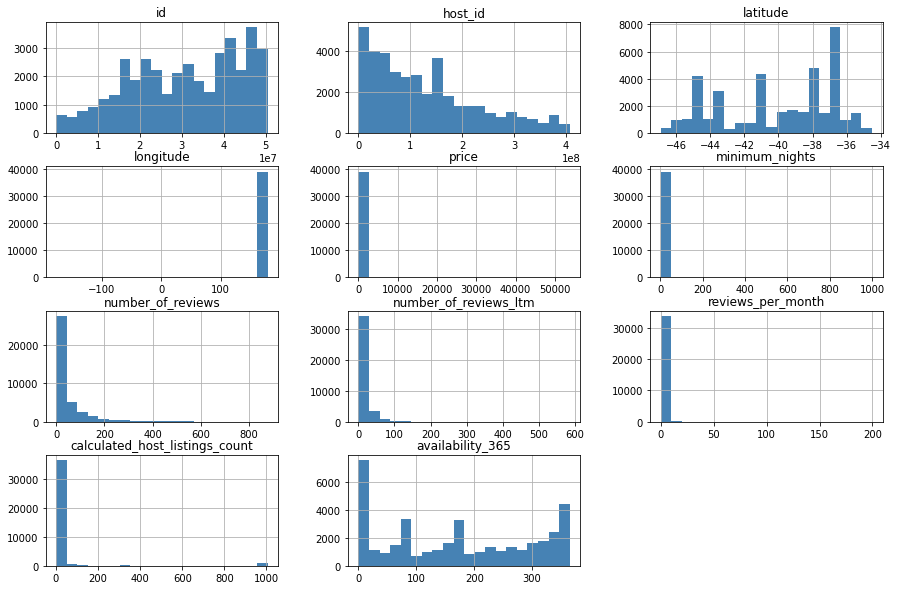

In [10]:
# Plot the histogram of numerical variables

airbnb.hist(bins=20, figsize=(15,10), color="Steelblue", grid=True);

Based on the distribution of the visuals, we can see evidences that the dataset may present outliers in the following variables: `longitude`, `price`, `minimum_nights`, `reviews_per_month`, `calculated_host_listings_count`.

#### **4.3.2 Cleaning outliers**

Outliers are an extreme value that deviates from the other observations in the dataset. These values does not follow the a distribution and distort the entire graphical representation. 

To confirm, there are two quick ways to help detect outliers. Are they:

* Statistical summary using the describe() method
* Calculate the Interquartile Range (IQR)
* Plot boxplots for the variable

In [11]:
# See statistical summary 

airbnb[['longitude', 'price', 'minimum_nights', 'reviews_per_month', 
        'calculated_host_listings_count']].describe()

,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count
count,39026.000000,39026.000000,39026.000000,34316.000000,39026.000000
mean,173.648701,227.435786,2.422334,1.898623,35.423564
std,3.967591,496.958527,10.804603,3.060724,161.585543
min,-176.558530,12.000000,1.000000,0.010000,1.000000
25%,172.623830,95.000000,1.000000,0.370000,1.000000
50%,174.730185,150.000000,2.000000,1.050000,2.000000
75%,175.407120,250.000000,2.000000,2.512500,4.000000
max,178.479460,53788.000000,1000.000000,199.570000,1005.000000


Looking at the statistical summary above, we can confirm some hypotheses such as:

* The `longitude` maximum is 178.48, its average is 173.65, but its minimum is -176.56.
* The `price` variable has most of its value below NZD 250, but its maximum value is NZD 53,788.
* The maximum value of `minimum_nights` is above 365 days in the year.
* 75% of `reviews_per_month` is less than 2.51, but its maximum is 199.57.
* The `calculated_host_listings_count` has most of its values less than 4, but its maximum is 1005. 


There are several ways to clean _outliers_. For this analysis, we will use the IQR (_Interquartile Range_), defining minimum and maximum limits as we can see in the figure below.

<p><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>

Formula:

    IQR = Q3 - Q1

The IQR is calculated subtracting the Third Quartile (75%) by the First Quartile (25%).

To calculate the max and min, we use the following formulas:

- Minimum: **Q1 - (1.5 * IQR)**
- Maximum: **Q3 + (1.5 * IQR)**


##### **4.3.2.1 Price**

In [12]:
# price IQR

q1_price = airbnb.price.quantile(0.25)
q3_price = airbnb.price.quantile(0.75)
iqr_price = q3_price - q1_price
print('Price IQR: {:.2f}'.format(iqr_price))

# Price MAX

max_price = q3_price + (1.5 * iqr_price)
print('Price MAX: {:.2f}'.format(max_price))

# Price MIN

min_price = q1_price - (1.5 * iqr_price)
print('Price MIN: {:.2f}'.format(min_price))

Price IQR: 155.00
Price MAX: 482.50
Price MIN: -137.50


The dataset presents 2977 entries (7.63%) over NZD 482.50.
The dataset presents 0 entries (0.00%) less than NZD -137.50.



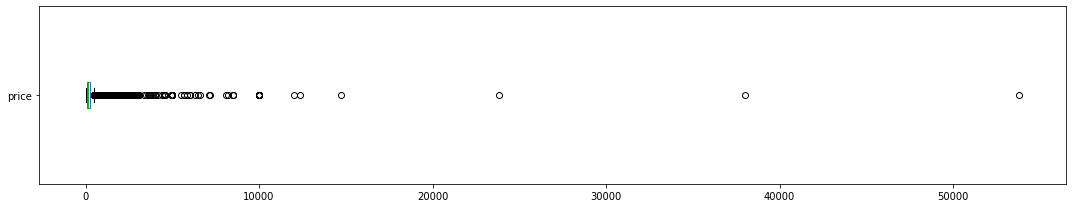

In [13]:
# See values over MAX

max_price_entries = len(airbnb[airbnb.price > max_price])
max_price_perc = (max_price_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) over NZD {:.2f}.".format(max_price_entries, max_price_perc, max_price))

# See values below MIN

min_price_entries = len(airbnb[airbnb.price < min_price])
min_price_perc = (min_price_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) less than NZD {:.2f}.\n".format(min_price_entries, min_price_perc, min_price))

# Boxplot for price

airbnb.price.plot(kind ='box', vert=False, figsize=(15,3))
plt.tight_layout()

##### **4.3.2.2 Longitude**

In [14]:
# Longitude IQR

q1_long = airbnb.longitude.quantile(0.25)
q3_long = airbnb.longitude.quantile(0.75)
iqr_long = q3_long - q1_long
print('Longitude IQR: {:.2f}'.format(iqr_long))

# Longitude MAX

max_long = q3_long + (1.5 * iqr_long)
print('Longitude MAX: {:.2f}'.format(max_long))

# Longitude MIN

min_long = q1_long - (1.5 * iqr_long)
print('Longitude MIN: {:.2f}'.format(min_long))

Longitude IQR: 2.78
Longitude MAX: 179.58
Longitude MIN: 168.45


The dataset presents 0 entries (0.00%) with longitude over than 179.58.
The dataset presents 768 entries (1.97%) with longitude less than 168.45.



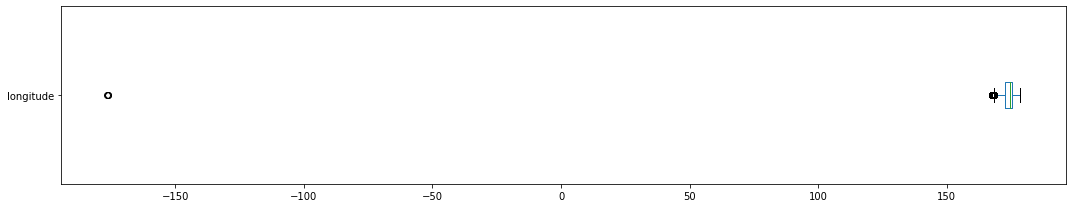

In [15]:
# See values over MAX

max_long_entries = len(airbnb[airbnb.longitude > max_long])
max_long_perc = (max_long_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) with longitude over than {:.2f}.".format(max_long_entries, max_long_perc, max_long))

# See values below MIN

min_long_entries = len(airbnb[airbnb.longitude < min_long])
min_long_perc = (min_long_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) with longitude less than {:.2f}.\n".format(min_long_entries, min_long_perc, min_long))

# Boxplot for longitude

airbnb.longitude.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

##### **4.3.2.3 Minimum Nights**

In [16]:
#  Minimum Nights IQR

q1_min_nig = airbnb.minimum_nights.quantile(.25)
q3_min_nig = airbnb.minimum_nights.quantile(.75)
iqr_min_nig = q3_min_nig - q1_min_nig
print('Minimum Nights IQR: {:.2f}'.format(iqr_min_nig))

#  Minimum Nights MAX

max_min_nig = q3_min_nig + (1.5 * iqr_min_nig)
print('Minimum Nights MAX: {:.2f}'.format(max_min_nig))

#  Minimum Nights MIN

min_min_nig = q1_min_nig - (1.5 * iqr_min_nig)
print('Minimum Nights MIN: {:.2f}'.format(min_min_nig))

Minimum Nights IQR: 1.00
Minimum Nights MAX: 3.50
Minimum Nights MIN: -0.50


The dataset presents 2544 entries (6.52%) over 3.50 minimum nights.
The dataset presents 0 entries (0.00%) below -0.50 minimum nights.



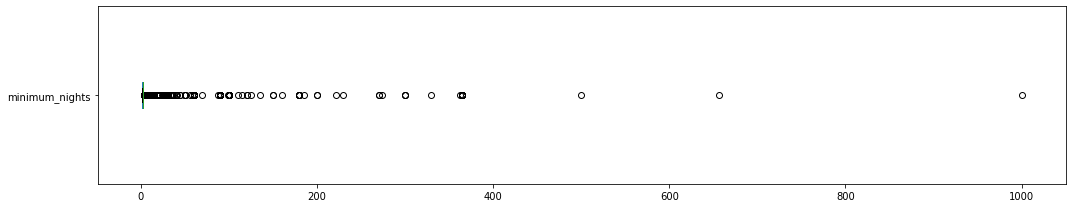

In [17]:
# See values over MAX

max_min_nig_entries = len(airbnb[airbnb.minimum_nights > max_min_nig])
max_min_nig_perc = (max_min_nig_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) over {:.2f} minimum nights.".format(max_min_nig_entries, max_min_nig_perc, max_min_nig))

# See values below MIN

min_min_nig_entries = len(airbnb[airbnb.minimum_nights < min_min_nig])
min_min_nig_perc = (min_min_nig_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) below {:.2f} minimum nights.\n".format(min_min_nig_entries, min_min_nig_perc, min_min_nig))

# Boxplot for minimum_nights

airbnb.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

##### **4.3.2.4 Reviews per Month**

In [18]:
# Reviews per Month IQR

q1_r_month = airbnb.reviews_per_month.quantile(.25)
q3_r_month = airbnb.reviews_per_month.quantile(.75)
iqr_r_month = q3_r_month - q1_r_month
print('Reviews per Month IQR: {:.2f}'.format(iqr_r_month))

# Reviews per Month MAX

max_r_month = q3_r_month + (1.5 * iqr_r_month)
print('Reviews per Month MAX: {:.2f}'.format(max_r_month))

# Reviews per Month MIN

min_r_month= q1_r_month - (1.5 * iqr_r_month)
print('Reviews per Month MIN: {:.2f}'.format(min_r_month))

Reviews per Month IQR: 2.14
Reviews per Month MAX: 5.73
Reviews per Month MIN: -2.84


The dataset presents 2086 entries (5.35%) over 5.73 reviews per month.
The dataset presents 0 entries (0.00%) less than -2.84 reviews per month.



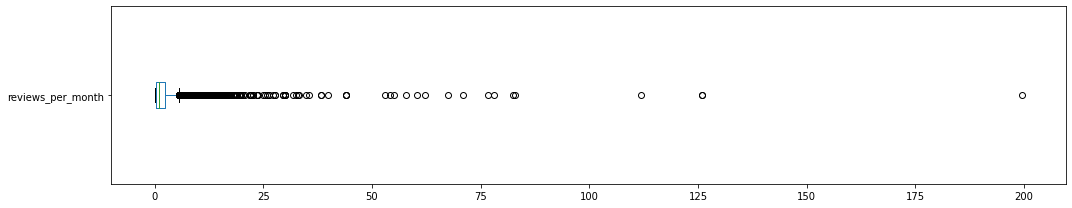

In [19]:
# See values over MAX

max_r_month_entries = len(airbnb[airbnb.reviews_per_month > max_r_month])
max_r_month_perc = (max_r_month_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) over {:.2f} reviews per month.".format(max_r_month_entries, max_r_month_perc, max_r_month))

# See values below MIN

min_r_month_entries = len(airbnb[airbnb.reviews_per_month < min_r_month])
min_r_month_perc = (min_r_month_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) less than {:.2f} reviews per month.\n".format(min_r_month_entries, min_r_month_perc, min_r_month))

# Boxplot for reviews_per_month

airbnb.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

##### **4.3.2.5 Calculated Host Listings Count**

In [20]:
# Calculated Host Listings Count IQR

q1_l_count = airbnb.calculated_host_listings_count.quantile(.25)
q3_l_count = airbnb.calculated_host_listings_count.quantile(.75)
iqr_l_count = q3_l_count - q1_l_count
print('Calculated Host Listings Count IQR: {:.2f}'.format(iqr_l_count))

# Calculated Host Listings Count IQR

max_l_count = q3_l_count + (1.5 * iqr_l_count)
print('Calculated Host Listings Count MAX: {:.2f}'.format(max_l_count))

# Calculated Host Listings Count IQR

min_l_count = q1_l_count - (1.5 * iqr_l_count)
print('Calculated Host Listings Count MIN: {:.2f}'.format(min_l_count))

Calculated Host Listings Count IQR: 3.00
Calculated Host Listings Count MAX: 8.50
Calculated Host Listings Count MIN: -3.50


The dataset presents 6439 entries (16.50%) over 8.50 count of listisngs by host.
The dataset presents 0 entries (0.00%) less than -3.50 count of listisngs by host.



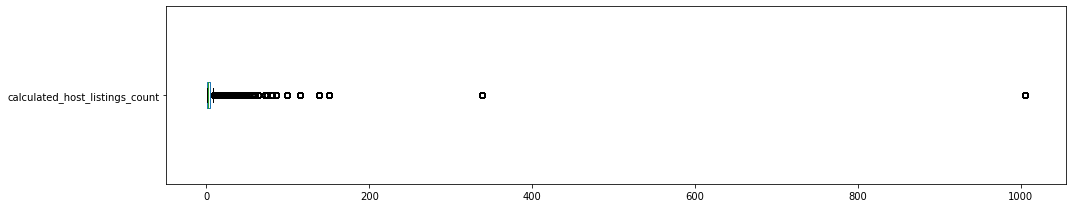

In [21]:
# See values over MAX

max_l_count_entries = len(airbnb[airbnb.calculated_host_listings_count > max_l_count])
max_l_count_perc = (max_l_count_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) over {:.2f} count of listisngs by host.".format(max_l_count_entries, max_l_count_perc, max_l_count))

# See values below MIN

min_l_count_entries = len(airbnb[airbnb.calculated_host_listings_count < min_l_count])
min_l_count_perc = (min_l_count_entries / airbnb.shape[0]) * 100
print("The dataset presents {} entries ({:.2f}%) less than {:.2f} count of listisngs by host.\n".format(min_l_count_entries, min_l_count_perc, min_l_count))

# Boxplot for calculated_host_listings_count

airbnb.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

##### **4.3.2.6 Removing Outliers**

Since we have identified outliers in the `longitude`, `price`, `minimum_nights`, `number_of_reviews`, and `calculated_host_listings_count` variables, let's now remove them. 

In [22]:
# Remove outliers in a new dataframe

airbnb_clean = airbnb.copy()
airbnb_clean.drop(airbnb_clean[airbnb_clean.longitude < min_long].index, axis = 0, inplace = True)
airbnb_clean.drop(airbnb_clean[airbnb_clean.price > max_price].index, axis = 0, inplace = True)
airbnb_clean.drop(airbnb_clean[airbnb_clean.minimum_nights > max_min_nig].index, axis = 0, inplace = True)
airbnb_clean.drop(airbnb_clean[airbnb_clean.reviews_per_month > max_r_month].index, axis = 0, inplace = True)
airbnb_clean.drop(airbnb_clean[airbnb_clean.calculated_host_listings_count > max_l_count].index, axis = 0, inplace = True)

#### **4.3.3 Distribution after clean outliers**

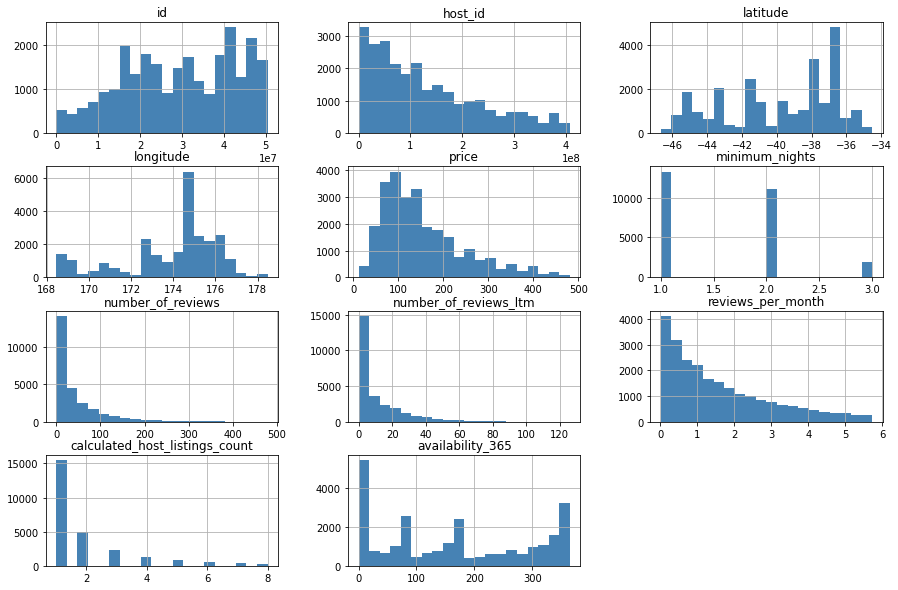

In [23]:
# Plot the histogram for numeric variables

airbnb_clean.hist(bins=20, figsize=(15,10), color="Steelblue", grid=True);

In [24]:
# Summary 

airbnb_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,reviews_per_month,calculated_host_listings_count,availability_365
count,2.625500e+04,2.625500e+04,26255.000000,26255.000000,26255.000000,26255.000000,26255.000000,26255.000000,23846.000000,26255.000000,26255.000000
mean,2.937611e+07,1.308941e+08,-39.896264,173.912121,154.601562,1.567016,41.430813,10.372653,1.599901,1.923405,165.907027
std,1.330483e+07,1.051925e+08,3.181071,2.277945,92.077253,0.623241,55.078132,13.868587,1.407435,1.506581,129.380083
min,6.113000e+03,2.576000e+03,-46.663550,168.452910,12.000000,1.000000,0.000000,0.000000,0.010000,1.000000,0.000000
25%,1.827633e+07,4.549595e+07,-42.722420,172.710480,88.000000,1.000000,5.000000,0.000000,0.450000,1.000000,48.000000
50%,3.016292e+07,1.047417e+08,-39.081450,174.736970,130.000000,1.000000,20.000000,5.000000,1.160000,1.000000,160.000000
75%,4.122117e+07,1.968227e+08,-36.920525,175.451400,200.000000,2.000000,57.000000,15.000000,2.410000,2.000000,298.000000
max,5.042977e+07,4.073551e+08,-34.516090,178.479460,481.000000,3.000000,479.000000,126.000000,5.720000,8.000000,365.000000


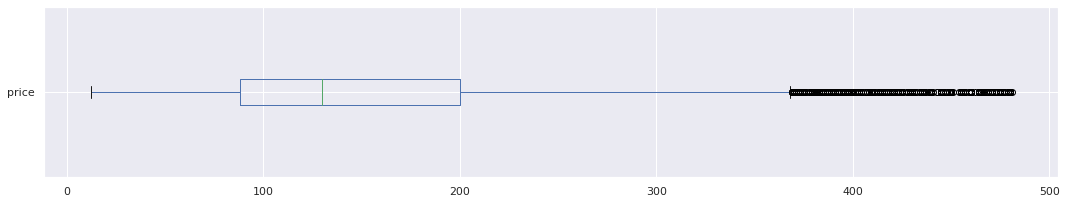

In [44]:
# Boxplot for price

airbnb_clean.price.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

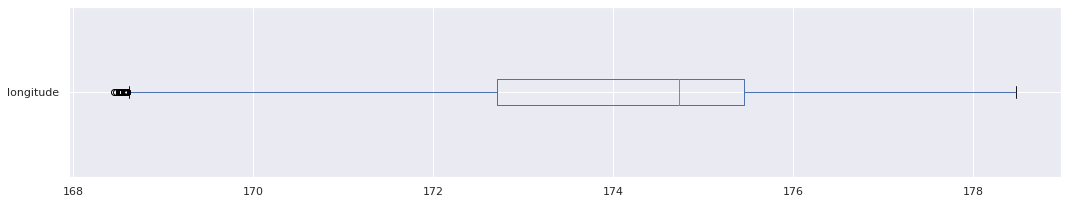

In [40]:
# Boxplot for longitude

airbnb_clean.longitude.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

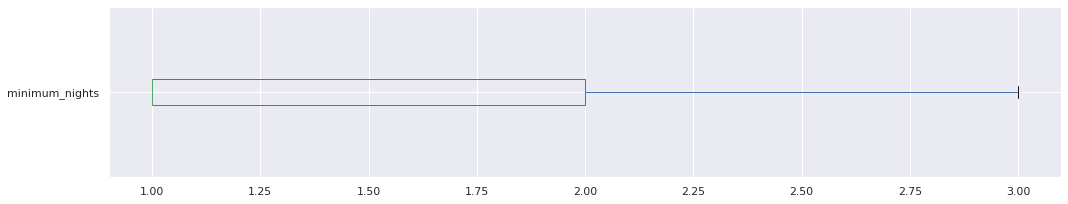

In [41]:
# Boxplot for minimum_nights

airbnb_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

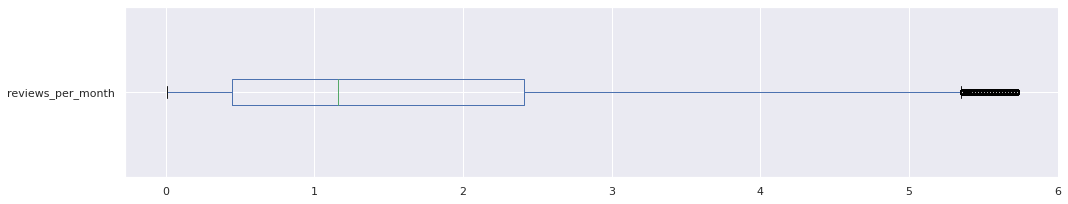

In [45]:
# Boxplot for reviews_per_month

airbnb_clean.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

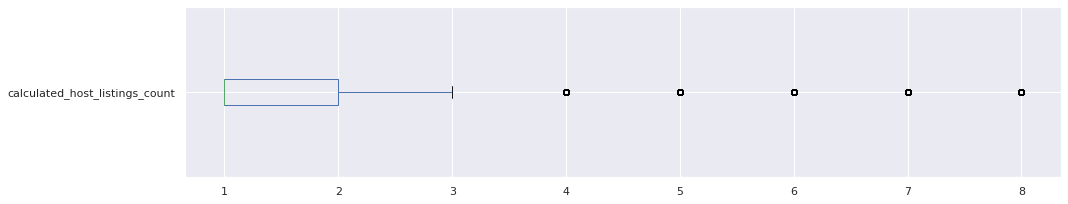

In [46]:
# Boxplot for calculated_host_listings_count

airbnb_clean.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.tight_layout()

## **5. Exploring and visualising data**

After we clean up the data, the next step is exploring it by visualising and analysing the values, looking to answer our questions.

### **5.1 What is the average of minimum nights?**

In [25]:
# Average of miminum_nights

avg_min_nig = airbnb_clean.minimum_nights.mean()
print(' The average of minimum nights in New Zealand is {:.1f}.'.format(avg_min_nig))

 The average of minimum nights in New Zealand is 1.6.


### **5.2 What is the most rented room type?**

Airbnb has four classification of room types as below: 

* Entire home/apt
* Private room
* Shared room
* Hotel room

To see the most rented room type we are going to plot a donut chart.

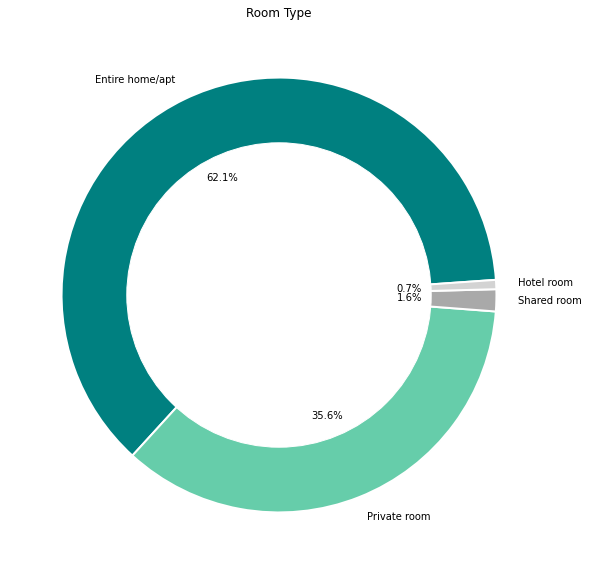

In [26]:
# Setting up the labels and sizes

labels = airbnb_clean.room_type.unique()
sizes = airbnb_clean.room_type.value_counts()

# Pie Chart

plt.figure(figsize = (15, 10))
plt.title("Room Type")
plt.pie(sizes, labels = labels, 
        colors=['teal', 'mediumaquamarine', 'darkgrey', 'lightgrey'], 
        autopct = '%1.1f%%', startangle = 364, 
        wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})

# Draw circle

circle = plt.Circle( (0, 0), 0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)

# Plot the chart

plt.show()

As we can observe in the visualisation, the **Entire home/apt** is the most rented rom type with 62.1% of the listings, followed by Private room with 35.6%.

### **5.3 What is the average price in the country?**

In [27]:
# Average of price in New Zealand

avg_price = airbnb_clean.price.mean()
print('Average Price: NZD {:.2f}'.format(avg_price))

Average Price: NZD 154.60


The average price paid in New Zealand at airbnb is NZD 154.60.

### **5.4 What is the most expensive and the cheapest location?**

#### **5.4.1 Most expensive location**

In [28]:
# Average price of top 5 most expensive locations

expensive = airbnb_clean.groupby(['neighbourhood_group']).price.mean().round(2).sort_values(ascending = False)[:5]
expensive

neighbourhood_group
Kaikoura District            204.38
Hastings District            202.59
Queenstown-Lakes District    198.72
Ruapehu District             191.34
South Wairarapa District     187.07
Name: price, dtype: float64

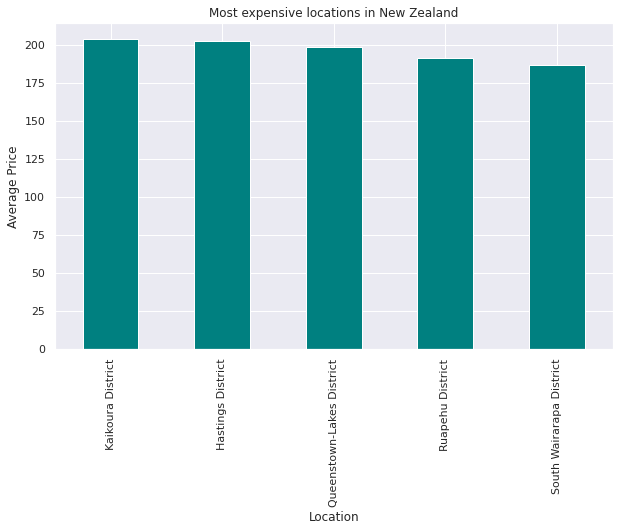

In [29]:
# Plot the bar chart

sns.set(rc = {'figure.figsize': (10, 6)})
bar_e = expensive.plot(kind = 'bar', color = 'teal')
bar_e.set_title('Most expensive locations in New Zealand')
bar_e.set_xlabel('Location')
bar_e.set_ylabel('Average Price');

The most expensive location in New Zealand is **Kaikoura**, with an average price of NZD 204.38, followed by Hastings (NZD 202.59), Queenstown (NZD 198.72), Ruapehu (NZD 191.34) and South Wairarapa (NZD 187.07).

#### **5.4.2 Cheapest location**

In [30]:
# Average price of top 5 cheapest locations

cheap = airbnb_clean.groupby(['neighbourhood_group']).price.mean().round(2).sort_values(ascending = True)[:5]
cheap

neighbourhood_group
Invercargill City        90.00
Tararua District        101.64
Upper Hutt City         108.32
Waimakariri District    110.98
Lower Hutt City         111.44
Name: price, dtype: float64

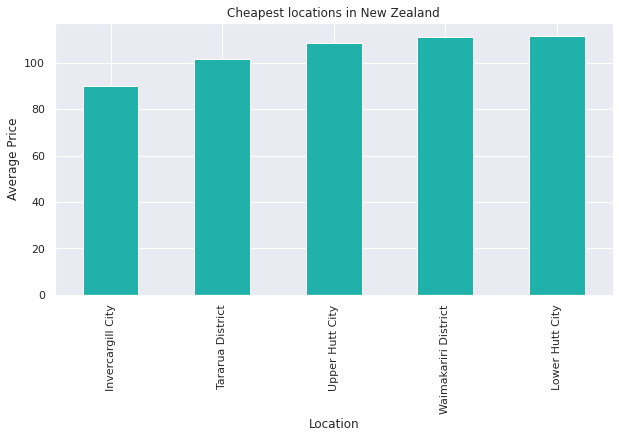

In [31]:
# Plot the bar chart

sns.set(rc = {'figure.figsize': (10, 5)})
bar_c = cheap.plot(kind = 'bar', color = 'lightseagreen')
bar_c.set_title('Cheapest locations in New Zealand')
bar_c.set_xlabel('Location')
bar_c.set_ylabel('Average Price');

The cheapest location in New Zealand is **Invercargill**, with an average price of NZD 90.00, followed by Tararua (NZD 101.64), Upper Hutt (NZD 108.32), Waimakariri (NZD 110.98) and Lower Hutt (NZD 111.44).

#### **5.4.3 Properties by latitude-longitude**

As latitudes and longitudes of properties are provided, it is possible to plot the scatter chart and see the distribution of listings by price in New Zealand. For this, we considered `x = longitude` and `y = latitude`.

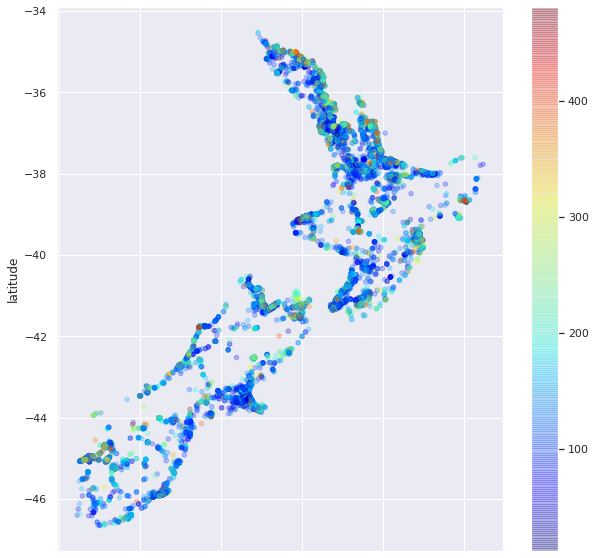

In [32]:
# Plot properties by latitude-longitude

airbnb_clean.plot(kind ="scatter", x = 'longitude', y = 'latitude', alpha = 0.25, 
                  c = airbnb_clean['price'], s = 20, cmap = plt.get_cmap('jet'), 
                  figsize = (10, 10));

As checked in the average price, most properties are below NZD 200.

### **5.5 What is the location with more properties listed?**

In [33]:
# Top 5 listings by location

more_list = airbnb_clean.neighbourhood_group.value_counts().head(5)
more_list

Auckland                     4979
Queenstown-Lakes District    2043
Christchurch City            1753
Far North District           1056
Tauranga City                1022
Name: neighbourhood_group, dtype: int64

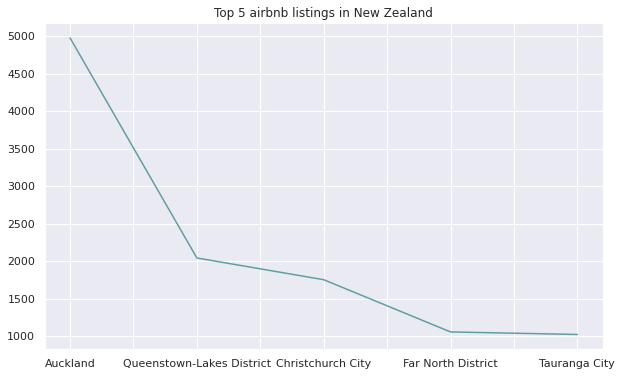

In [34]:
# Plot the line chart

sns.set(rc = {'figure.figsize': (10, 6)})
list_bar = more_list.plot(color = 'cadetblue')
list_bar.set_title('Top 5 airbnb listings in New Zealand');

The location with more listisngs in New Zealand is **Auckland**, with a total of 4,979 listings, followed by Queenstown (2,043), Christchurch (1,753) and Tauranga (1,022).

### **5.6 What is the correlation between the variables?**

Correlation means that there is a relationship between two things. In our context, we are looking for a relationship or similarity between two variables.

To identify the correlation of the variables, we are going to:

* Create a correlation matrix
* Generate a heatmap using the `seaborn` library

In [35]:
# Create the matrix of correlation

corr = airbnb_clean[['price', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.283121,-0.146830,-0.062005,-0.147112,0.077527,0.104837
minimum_nights,0.283121,1.000000,-0.058886,-0.058718,-0.111878,-0.161115,-0.095428
number_of_reviews,-0.146830,-0.058886,1.000000,0.571243,0.725652,-0.103419,0.036358
number_of_reviews_ltm,-0.062005,-0.058718,0.571243,1.000000,0.731694,-0.113313,0.110241
reviews_per_month,-0.147112,-0.111878,0.725652,0.731694,1.000000,-0.132017,0.015146
calculated_host_listings_count,0.077527,-0.161115,-0.103419,-0.113313,-0.132017,1.000000,0.142469
availability_365,0.104837,-0.095428,0.036358,0.110241,0.015146,0.142469,1.000000


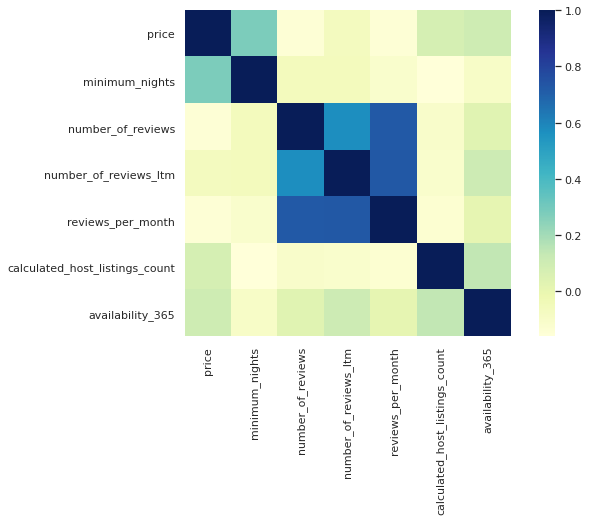

In [36]:
# Generate the heatmap

sns.heatmap(corr, cmap = "YlGnBu", fmt = '.2f', square = True, linecolor = 'white');

Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. That means, in our dataset, the strongest relationship is between `reviews_per_month`, `number_of_reviews`, `number_of_reviews_ltm` variables.

## **6. Conclusion**

This study was only a surperficial analysis of airbnb summarized data but we could get some insights from the listings in New Zealand, as below:

* Auckland, as the biggest city in the country, is the location with more listings, followed by Queestown, the most touristic place
* Kaikoura is the most expensive district
* Invercargill is the cheapest city to stay
* The average of minimum nights is 1.6, as it is commom to travel and explore the country during the weekends

We could also identify some outliers which can distort the statistical information of some attributes.

The purpose of this analysis was to perform an initial approach and create some intimacy with this data. For future analysis, the plan is to use the complete dataset, with 106 attributes, to conduct a more robust exploratory analysis.